### Simulate the Monty Hall Problem

- Simulate three doors, one car, and two goats.
 - Simulate three players: the switcher, the conservative, and the newcomer. 
 - Record who wins.
 - Repeat it many times.
 - Which player do you want to be?
 
 - What would happen if you had 100 doors to choose from and the presenter opens 98 or them?
 
- And what if you had $N$ doors to choose from and the presenter opens $M\leq N-2$ of them? Study how the probability of winning changes as a function of $M$ and $N$.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats

from sklearn.neighbors import KernelDensity

from astropy.visualization import hist
from sklearn.mixture import GaussianMixture


#### Three doors

In [17]:
#goats = 0
#car = 1

def create_doors(N):
    d=np.zeros(N)
    d[np.random.randint(0, N)] = 1
    
    return d

In [50]:
def switch_game(doors, choice):

    if doors[choice]==0:
        return 1
    else: return 0

def cons_game(doors, choice):
    
    if doors[choice]==0:
        return 0
    else: return 1

def new_game(doors, choice):
    
    doors_open = np.random.choice([i for i in range(N) if i != choice and i != np.where(doors == 1)[0][0]])
    available_indices = [i for i in range(N) if i != doors_open]
    new_choice = np.random.choice(available_indices, 1)
   
    if doors[new_choice]==0:
        return 0
    else: return 1

In [51]:
N = 3
games = 1000
game_s = np.empty(games)
game_c = np.empty(games)
game_n = np.empty(games)

for i in range(games):
    doors = create_doors(N)
    choice = np.random.randint(0, N)
    #print('doors', doors)
    #print('choice', choice)
    game_s[i] = switch_game(doors, choice)
    game_c[i] = cons_game(doors, choice)
    game_n[i] = new_game(doors, choice)

s_loose=len(np.where(game_s==0)[0])
s_win=games-s_loose
print('switcher wins', s_win, 'times and loose', s_loose, 'times')

c_loose=len(np.where(game_c==0)[0])
c_win=games-c_loose
print('conservative wins', c_win, 'times and loose', c_loose, 'times')

n_loose=len(np.where(game_n==0)[0])
n_win=games-n_loose
print('newcomer wins', n_win, 'times and loose', n_loose, 'times')


switcher wins 682 times and loose 318 times
conservative wins 318 times and loose 682 times
newcomer wins 505 times and loose 495 times


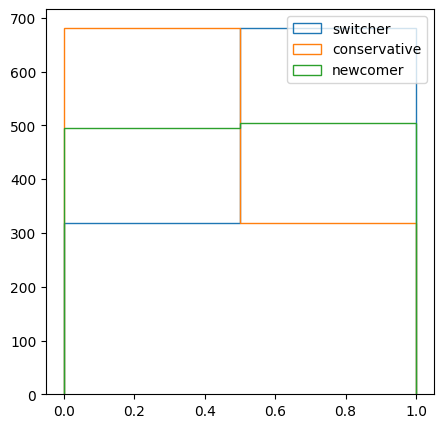

In [52]:
fig,ax = plt.subplots(figsize=(5, 5))
plt.hist(game_s, 2, histtype='step', label='switcher')
plt.hist(game_c, 2, histtype='step', label='conservative')
plt.hist(game_n, 2, histtype='step', label='newcomer')

ax.legend(loc='upper right')
fig.show()

In [ ]:
#RIVEDI DA QUA

#### 100 doors and the presenter open 98

In [22]:
N = 100
games = 1000
game_s = np.empty(1000)
game_c = np.empty(1000)
game_n = np.empty(1000)

for i in range(games):
    doors = create_doors(N)
    choice = np.random.randint(0, N)
    game_s[i] = switch_game(doors, choice)
    game_c[i] = cons_game(doors, choice)
    game_n[i] = new_game(doors, N)

s_loose=len(np.where(game_s==0)[0])
s_win=games-s_loose
print('switcher wins', s_win, 'times and loose', s_loose, 'times')

c_loose=len(np.where(game_c==0)[0])
c_win=games-c_loose
print('conservative wins', c_win, 'times and loose', c_loose, 'times')

n_loose=len(np.where(game_n==0)[0])
n_win=games-n_loose
print('newcomer wins', n_win, 'times and loose', n_loose, 'times')

switcher wins 990 times and loose 10 times
conservative wins 10 times and loose 990 times
newcomer wins 11 times and loose 989 times


### N doors and the presenter open M<N-2 (4/09)

In [25]:
def new_switch_game(doors, choice, M):

    if doors[choice]==1:
        return 0
    else:
        available_indices = [i for i in range(N) if i != np.where(doors == 1)[0][0] and i != choice]
        doors_open = np.random.choice(available_indices, M, replace=False)
        available_indices = [i for i in available_indices if i not in doors_open]
        new_choice = np.random.choice(available_indices, 1)[0]
        
        if doors[new_choice] == 1:
            return 1
        else:
            return 0

In [22]:
N = 100
M = 
games = 1000
game_s = np.empty(1000)
game_c = np.empty(1000)
game_n = np.empty(1000)

for i in range(games):
    doors = create_doors(N)
    choice = np.random.randint(0, N)
    game_s[i] = new_switch_game(doors, choice, M)
    game_c[i] = cons_game(doors, choice)
    game_n[i] = new_game(doors, N)

s_loose=len(np.where(game_s==0)[0])
s_win=games-s_loose
print('switcher wins', s_win, 'times and loose', s_loose, 'times')

c_loose=len(np.where(game_c==0)[0])
c_win=games-c_loose
print('conservative wins', c_win, 'times and loose', c_loose, 'times')

n_loose=len(np.where(game_n==0)[0])
n_win=games-n_loose
print('newcomer wins', n_win, 'times and loose', n_loose, 'times')

switcher wins 990 times and loose 10 times
conservative wins 10 times and loose 990 times
newcomer wins 11 times and loose 989 times


#### (rivedi non va) N doors and the presenter open M<N-2

In [246]:
def switch_game(doors, N, M): #NON FUNZIONA QUESTA FUNZIONE RIVEDIIII

    index=np.zeros(M)    
    choice = int(np.random.randint(0, N))
    print('porte iniziali', doors)
    print('choice', choice)
    if doors[choice]==1:
        return 0
    else:
        for i in range(len(doors)):
            if doors[i]==0 and i!=choice:
                print(i)
                index[i]=int(i)
                print(index[i])
                if index[M-1]!=0:
                    else: aux=aux+1
                    break
            #if i==choice or doors[i]==1: i=i+1

        print(index)
        ind_to_delete = index + [choice]
        print('indici da eliminare', ind_to_delete)
        new_doors = np.delete(doors, ind_to_delete)
        print('nuova porta', new_doors)
        choice = np.random.randint(0, N-M-1)
        print('nuova scelta', choice)
  
        if new_doors[choice]==1:
            return 1
        else: return 0

def cons_game(doors, N):
    choice = np.random.randint(0, N)
    if doors[choice]==0:
        return 0
    else: return 1

In [247]:
N=10
doors = create_doors(N)


In [248]:
games = 10
game_s = np.empty(games)
game_c = np.empty(games)

M=np.linspace(0,N-2,N-1)

for i in range(games):
    doors = create_doors(N)
    game_s[i] = switch_game(doors, M[3], N)
    game_c[i] = cons_game(doors, N)

s_loose=len(np.where(game_s==0)[0])
s_win=games-s_loose
print('switcher wins', s_win, 'times and loose', s_loose, 'times')

c_loose=len(np.where(game_c==0)[0])
c_win=games-c_loose
print('conservative wins', c_win, 'times and loose', c_loose, 'times')

porte iniziali [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
choice 1
0
0.0
2
2.0
3
3.0
4
4.0
6
6.0
7
7.0
8
8.0
9
9.0
[0. 0. 2. 3. 4. 0. 6. 7. 8. 9.]
indici da eliminare [ 1.  1.  3.  4.  5.  1.  7.  8.  9. 10.]


IndexError: arrays used as indices must be of integer (or boolean) type

#### N doors and the presenter open ONE

In [133]:
def create_doors(N):
    d=np.zeros(N)
    d[np.random.randint(0, N)] = 1
    
    return d

In [155]:
def switch_game(doors):
    
    choice = np.random.randint(0, N)
    if doors[choice]==1:
        return 0
    else:
        for i in range(len(doors)):
            if doors[i]==0 and i!=choice:
                break
                
        ind_to_delete = [choice, i]
        new_doors = np.delete(doors, ind_to_delete)
        choice = np.random.randint(0, N-2)
  
        if new_doors[choice]==1:
            return 1
        else: return 0

def cons_game(doors):
    choice = np.random.randint(0, N)
    if doors[choice]==0:
        return 0
    else: return 1

In [156]:
N=100
doors = create_doors(N)


In [159]:
games = 100000
game_s = np.empty(games)
game_c = np.empty(games)

for i in range(games):
    doors = create_doors(N)
    game_s[i] = switch_game(doors)
    game_c[i] = cons_game(doors)

s_loose=len(np.where(game_s==0)[0])
s_win=games-s_loose
print('switcher wins', s_win, 'times and loose', s_loose, 'times')

c_loose=len(np.where(game_c==0)[0])
c_win=games-c_loose
print('conservative wins', c_win, 'times and loose', c_loose, 'times')

switcher wins 995 times and loose 99005 times
conservative wins 989 times and loose 99011 times
